In [2]:

import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
#reading my thyroid dataset
hospital_dataset = read_csv('thyroidDF.csv')
display(hospital_dataset)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [4]:
# Showing the first and last 10 rows.
hospital_dataset.head(10)
hospital_dataset.tail(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
9162,36,F,f,f,f,f,f,f,f,f,...,84.0,t,1.26,t,67.0,f,NaN,other,I,870119008
9163,69,F,t,f,f,f,f,f,f,f,...,94.0,t,0.94,t,100.0,f,NaN,SVI,-,870119009
9164,40,F,f,f,f,f,f,f,f,f,...,67.0,t,0.79,t,85.0,f,NaN,other,-,870119019
9165,33,F,f,f,f,f,f,f,f,f,...,76.0,t,0.66,t,115.0,f,NaN,other,-,870119020
9166,70,F,f,f,f,f,f,f,f,f,...,88.0,t,0.74,t,119.0,f,NaN,SVI,-,870119021
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027
9171,31,M,f,f,f,f,f,f,f,t,...,66.0,t,1.02,t,65.0,f,NaN,other,-,870119035


In [5]:

#number of rows and columns in the thyroid dataset
rows , columns = hospital_dataset.shape
print('the number of rows :',rows)
print('the number of columns', columns)

the number of rows : 9172
the number of columns 31


In [6]:

#the names of all the columns
print(hospital_dataset.columns)

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')


In [ ]:

#the name of the last column
print(hospital_dataset.columns[-1])

patient_id


In [ ]:

#general information of the dataset
hospital_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:

# categorical column with the unique value in the column
hospital_dataset['referral_source'].nunique()


6

In [8]:

#most occured value in the column chosen
value = hospital_dataset['referral_source'].value_counts().idxmax()
count = hospital_dataset['referral_source'].value_counts().max()
text = 'The common referral source of thyroids is {} & the Count is {}'
print(text.format(value,count))


The common referral source of thyroids is other & the Count is 5493


In [9]:
#Find the mean of all columns

numerical_columns = hospital_dataset.select_dtypes(include=['int', 'float'])
mean = numerical_columns.mean()

# Print the mean values
print(mean)



age           7.355582e+01
TSH           5.218403e+00
T3            1.970629e+00
TT4           1.087003e+02
T4U           9.760557e-01
FTI           1.136407e+02
TBG           2.987006e+01
patient_id    8.529473e+08
dtype: float64


In [10]:

#standard deviation

num_std = hospital_dataset.select_dtypes(include=['int', 'float'])

# Calculate the standard deviation for each numerical column
standard_deviation = num_std.std()

# Print the standard deviation values
print('Standard deviation:', standard_deviation)


Standard deviation: age           1.183977e+03
TSH           2.418401e+01
T3            8.875788e-01
TT4           3.752267e+01
T4U           2.003604e-01
FTI           4.155165e+01
TBG           2.108050e+01
patient_id    7.581969e+06
dtype: float64


In [11]:
#percentile (25%, 50% and 75% ) for all numerical values
percentiles = hospital_dataset.describe(percentiles=[0.25, 0.5, 0.75])


percentile25 = percentiles.loc['25%']
percentile50 = percentiles.loc['50%']
percentile75 = percentiles.loc['75%']
print(percentile25)
print(percentile50)
print(percentile75)



#just testing
percentile25 = np.percentile(hospital_dataset['TSH'], 25)
percentile50 = np.percentile(hospital_dataset['TSH'], 50)
percentile75 = np.percentile(hospital_dataset['TSH'], 75)

print(percentile25)


all_the_percentages = hospital_dataset.describe() #without being specific of a particular column
print(all_the_percentages)


age           3.700000e+01
TSH           4.600000e-01
T3            1.500000e+00
TT4           8.700000e+01
T4U           8.600000e-01
FTI           9.300000e+01
TBG           2.100000e+01
patient_id    8.504090e+08
Name: 25%, dtype: float64
age           5.500000e+01
TSH           1.400000e+00
T3            1.900000e+00
TT4           1.040000e+02
T4U           9.600000e-01
FTI           1.090000e+02
TBG           2.600000e+01
patient_id    8.510040e+08
Name: 50%, dtype: float64
age           6.800000e+01
TSH           2.700000e+00
T3            2.300000e+00
TT4           1.260000e+02
T4U           1.065000e+00
FTI           1.280000e+02
TBG           3.100000e+01
patient_id    8.607110e+08
Name: 75%, dtype: float64
nan
                age          TSH           T3          TT4          T4U  \
count   9172.000000  8330.000000  6568.000000  8730.000000  8363.000000   
mean      73.555822     5.218403     1.970629   108.700305     0.976056   
std     1183.976718    24.184006     0.887579

In [12]:

# the names of data in the column tumor
t_names = hospital_dataset[hospital_dataset['tumor'].str.startswith('T')]
#the count of it
count_names = t_names.shape[0]
print(t_names)
print('.....................................')
print(count_names)


Empty DataFrame
Columns: [age, sex, on_thyroxine, query_on_thyroxine, on_antithyroid_meds, sick, pregnant, thyroid_surgery, I131_treatment, query_hypothyroid, query_hyperthyroid, lithium, goitre, tumor, hypopituitary, psych, TSH_measured, TSH, T3_measured, T3, TT4_measured, TT4, T4U_measured, T4U, FTI_measured, FTI, TBG_measured, TBG, referral_source, target, patient_id]
Index: []

[0 rows x 31 columns]
.....................................
0


In [13]:

#filtered rows of people with the age greater or equal to 60
filtered_rows = hospital_dataset[hospital_dataset['age'] >=60]
print(filtered_rows)

      age  sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
5      60    F            f                  f                   f    f   
6      77    F            f                  f                   f    f   
18     63    F            t                  f                   f    t   
23     77    F            f                  f                   f    f   
24     77  NaN            f                  f                   f    f   
...   ...  ...          ...                ...                 ...  ...   
9159   72    F            f                  f                   f    f   
9160   72    F            f                  f                   f    f   
9163   69    F            t                  f                   f    f   
9166   70    F            f                  f                   f    f   
9169   69    M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
5           f        

In [14]:

print(hospital_dataset.duplicated().sum())#the sum of all duplicates
print(hospital_dataset['sex'].duplicated().sum())#testing with a particular column


drop_duplicates= hospital_dataset.drop_duplicates()
print(drop_duplicates)

0
9169
      age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
0      29   F            f                  f                   f    f   
1      29   F            f                  f                   f    f   
2      41   F            f                  f                   f    f   
3      36   F            f                  f                   f    f   
4      32   F            f                  f                   f    f   
...   ...  ..          ...                ...                 ...  ...   
9167   56   M            f                  f                   f    f   
9168   22   M            f                  f                   f    f   
9169   69   M            f                  f                   f    f   
9170   47   F            f                  f                   f    f   
9171   31   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
0           f             

In [ ]:
#d) Change type of numerical column from int to object.
#converting from int to an object
hospital_dataset['age'].astype(object)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [15]:

#missing values of the thyroid dataset
missing_values = hospital_dataset.isnull().sum()
print(missing_values)

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64


In [20]:

#the max value in the column T4U
max_row = hospital_dataset['T4U'].max()
print(max_row)


#the index of the column
max_row_i = hospital_dataset['T4U'].idxmax()
print(max_row_i)





2.33
7447


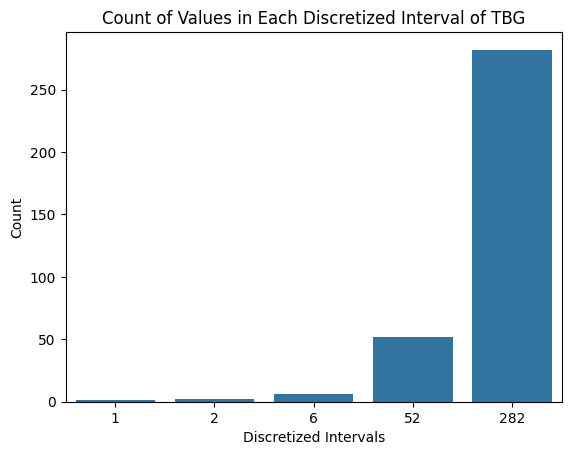

In [ ]:
# h) Discretize any numerical column into 6 groups using equal interval method and count the values in
# each bin/Group. Make sure intervals are sorted when counting them).
# Discretizing the 'TBG' column into 6 groups using equal intervals
hospital_dataset['discretized_columns'] = pd.cut(hospital_dataset['TBG'], bins=6)

# Counting the values in each bin
bin_counts = hospital_dataset['discretized_columns'].value_counts().sort_index()

# Plotting the count distribution using seaborn and matplotlib
sns.barplot(x=bin_counts, y=bin_counts.values)
plt.xlabel('Discretized Intervals')
plt.ylabel('Count')
plt.title('Count of Values in Each Discretized Interval of TBG')
plt.show()

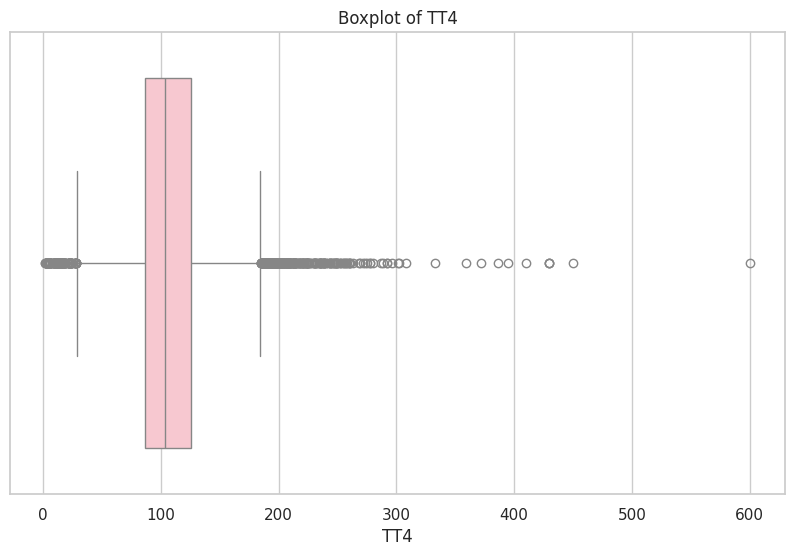

In [ ]:
#j) Make a suitable boxplot with any chosen attribute from the data set (Think about why chosing
#this attribute before plotting).

#Box plot of TT4 it shows the median,the range, and the data out of range
#which is considered as outliers

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='TT4', data=hospital_dataset, color='PINK')
plt.title('Boxplot of TT4')
plt.show()


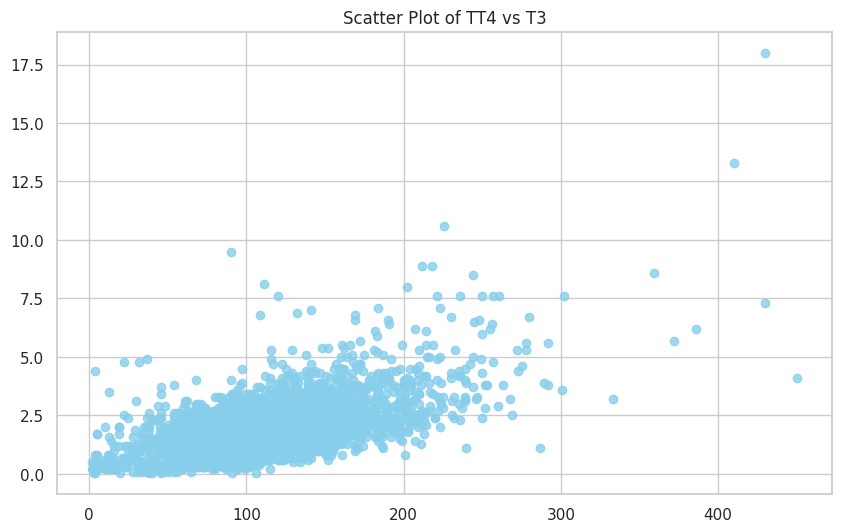

In [ ]:
# k) Make a suitable histogram with any chosen attribute from the data set (Think about why chosing
#this attribute before plotting).

plt.figure(figsize=(10, 6))#creating the figure of the graph
plt.scatter(hospital_dataset['TT4'], hospital_dataset['T3'], color='skyblue', alpha=0.8)#plotting TT4 data
plt.title('Scatter Plot of TT4 vs T3')

plt.show()

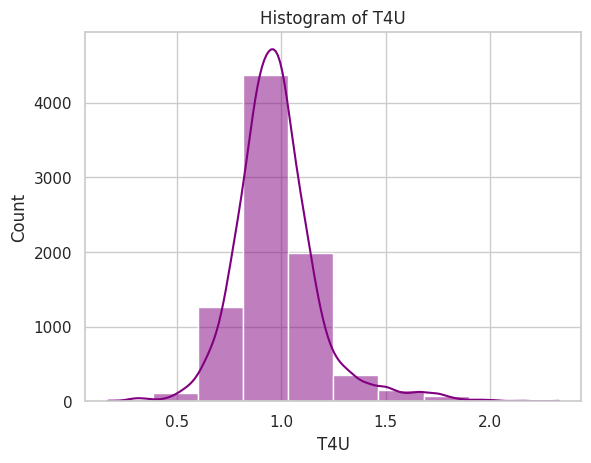

In [ ]:
# l) Make a suitable scatterplot with any chosen attributes from the data set (Think about why chosing
#this attribute before plotting).
#using a histogram to plot the data of T4U
sns.histplot(hospital_dataset['T4U'], bins=10, kde=True, color='purple')
plt.title('Histogram of T4U')
plt.xlabel('T4U')
plt.ylabel('Count')
plt.show()

In [ ]:
#m) Standardize the numerical features in your dataset using the StandardScaler
#standard Scaler of numerical columns
numerical_columns = hospital_dataset.select_dtypes(include='number')
scale= StandardScaler()
standard_scaler = scale.fit_transform(numerical_columns)
print(standard_scaler)






[[-0.0376344  -0.2033864          nan ...         nan         nan
  -1.60208993]
 [-0.0376344  -0.14962864 -0.07958074 ...         nan         nan
  -1.60208979]
 [-0.02749851         nan         nan ...         nan -0.89642781
  -1.6020861 ]
 ...
 [-0.00384811         nan         nan ... -0.59305028         nan
   2.26492815]
 [-0.02243057         nan         nan ... -0.61711816         nan
   2.26492842]
 [-0.03594508         nan         nan ... -1.17067919         nan
   2.26492947]]


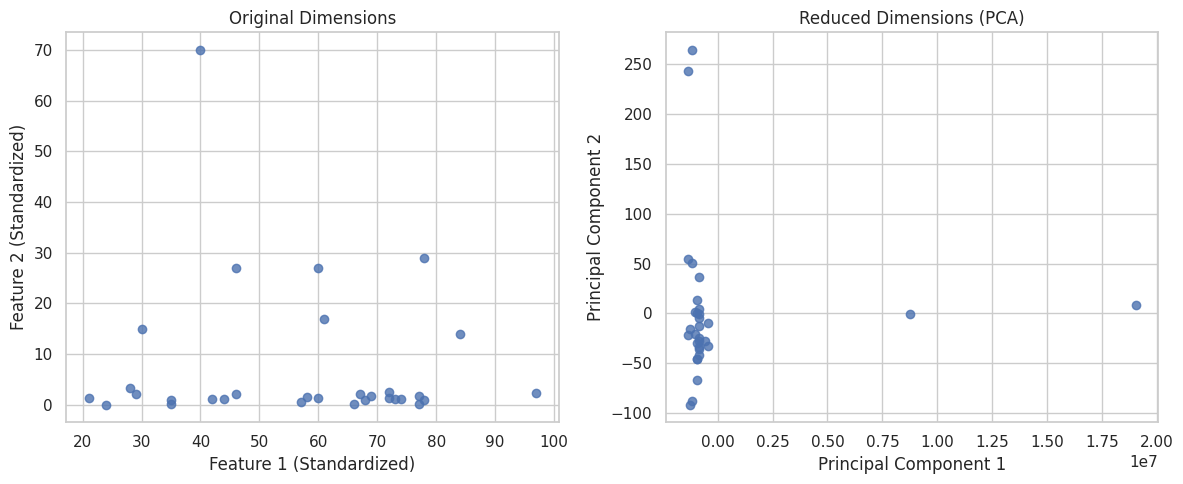

In [ ]:
# n) ApplyPrincipal Component Analysis (PCA) to the standardized dataset, retaining two components.
 #PCAis a dimensionality reduction technique that captures the most significant variance in the data.
 #Visualize both the original and the reduced dimensions.

#standarizing it first and selecting numerical columns
s = StandardScaler()
standarized = hospital_dataset.select_dtypes(include='number')
#applying the pca component to reduce dimension to the dataset
#to seperate them into 2 pca components

pca_component = PCA(n_components=2)
#applying the pca
standarized = standarized.dropna()
pca = pca_component.fit_transform(standarized)

plt.figure(figsize=(12, 5))

# Plotting the original dimensions
plt.subplot(1, 2, 1)
plt.scatter(standarized.iloc[:, 0], standarized.iloc[:, 1], alpha=0.8)
plt.title('Original Dimensions')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')

#plotting the dimensions after reduction using the pca
plt.subplot(1, 2, 2)
plt.scatter(pca[:, 0], pca[:, 1], alpha=0.8)
plt.title('Reduced Dimensions (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.tight_layout()

plt.show()